In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants/download")

Skipping, found downloaded files in ".\zomato-bangalore-restaurants" (use force=True to force download)


#### Importing all required libraries-

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  ExtraTreesRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## * Loading Dataset *

In [5]:
data = pd.read_csv("C:/Users/MY/anaconda3/DS_Manpreet/GitHub/Zomato Restaurant rating Prediction/zomato-bangalore-restaurants/zomato.csv")

In [6]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Columns description
**url**- contains the url of the restaurant in the zomato website

**address**- contains the address of the restaurant in Bengaluru

**name**- contains the name of the restaurant

**online_order-** whether online ordering is available in the restaurant or not

**book_table-** table book option available or not

**rate-** contains the overall rating of the restaurant out of 5

**votes-** contains total number of rating for the restaurant as of the above mentioned date

**phone-** contains the phone number of the restaurant

**location-** contains the neighborhood in which the restaurant is located

**rest_type-** restaurant type

**dish_liked-** dishes people liked in the restaurant

**cuisines-** food styles, separated by comma

**approx_cost(for two people)-** contains the approximate cost of meal for two people

**reviews_list-** list of tuples containing reviews for the restaurant, each tuple

**menu_item-** contains list of menus available in the restaurant

**listed_in(type)-** type of meal

**listed_in(city)-** contains the neighborhood in which the restaurant is listed

In [7]:
data.shape # Checking shape

(51717, 17)

In [8]:
data.dtypes # Checking datatypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

## * Data preprocessing *

In [9]:
data.isnull().sum() #Checking null values

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [11]:
# Dropping the columns "url", "phone" and saving the new dataset as "df"

df = data.drop(['url','phone'],axis=1)
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [12]:
# Renaming 'approx_cost(for two people)' ,listed_in(type) and listed_in(city) as they have multiple data-types.

df.rename({'approx_cost(for two people)': 'cost',
               'listed_in(type)':'type',
               'listed_in(city)':'city'}, axis=1, inplace=True)
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [13]:
# Converting 'votes' and 'cost' into numeric(int)
# 'votes' and 'cost' have values like 1,000. So we will change them into pure numeric values. For this, we will use the lambda function.

remove_comma = lambda x: int(x.replace(',', '')) if type(x) == str and x != np.nan else x 
df.votes = df.votes.astype('int')
df['cost'] = df['cost'].apply(remove_comma)

In [14]:
# Confirming the data-types of 'votes' and 'approx_cost_for_2_people'

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       51717 non-null  object 
 1   name          51717 non-null  object 
 2   online_order  51717 non-null  object 
 3   book_table    51717 non-null  object 
 4   rate          43942 non-null  object 
 5   votes         51717 non-null  int32  
 6   location      51696 non-null  object 
 7   rest_type     51490 non-null  object 
 8   dish_liked    23639 non-null  object 
 9   cuisines      51672 non-null  object 
 10  cost          51371 non-null  float64
 11  reviews_list  51717 non-null  object 
 12  menu_item     51717 non-null  object 
 13  type          51717 non-null  object 
 14  city          51717 non-null  object 
dtypes: float64(1), int32(1), object(13)
memory usage: 5.7+ MB


In [15]:
# Now we will convert 'rate' into float; Checking unique values of "rate"

df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
# We remove the restaurent datas which has rate='NEW'

df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)

In [17]:
# Now we will remove '/5'

remove_slash = lambda x: x.replace('/5', '') if type(x) == str else x
df.rate = df.rate.apply(remove_slash).astype(str).str.strip().astype('float') 

In [18]:
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [19]:
# 'rate' column has converted to float datatype-

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49440 entries, 0 to 49439
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       49440 non-null  object 
 1   name          49440 non-null  object 
 2   online_order  49440 non-null  object 
 3   book_table    49440 non-null  object 
 4   rate          41665 non-null  float64
 5   votes         49440 non-null  int32  
 6   location      49419 non-null  object 
 7   rest_type     49215 non-null  object 
 8   dish_liked    23492 non-null  object 
 9   cuisines      49395 non-null  object 
 10  cost          49099 non-null  float64
 11  reviews_list  49440 non-null  object 
 12  menu_item     49440 non-null  object 
 13  type          49440 non-null  object 
 14  city          49440 non-null  object 
dtypes: float64(2), int32(1), object(12)
memory usage: 5.5+ MB


#### Categorical encoding

In [20]:
# Changing data type of 'book_table' from string to int

df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0

In [21]:
df.book_table = pd.to_numeric(df.book_table)

In [22]:
df.book_table.value_counts()

0    43120
1     6320
Name: book_table, dtype: int64

In [23]:
# Changing data type of 'online_order' from string to int

df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0

In [24]:
df.online_order = pd.to_numeric(df.online_order)

In [25]:
df.online_order.value_counts()

1    29342
0    20098
Name: online_order, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49440 entries, 0 to 49439
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       49440 non-null  object 
 1   name          49440 non-null  object 
 2   online_order  49440 non-null  int64  
 3   book_table    49440 non-null  int64  
 4   rate          41665 non-null  float64
 5   votes         49440 non-null  int32  
 6   location      49419 non-null  object 
 7   rest_type     49215 non-null  object 
 8   dish_liked    23492 non-null  object 
 9   cuisines      49395 non-null  object 
 10  cost          49099 non-null  float64
 11  reviews_list  49440 non-null  object 
 12  menu_item     49440 non-null  object 
 13  type          49440 non-null  object 
 14  city          49440 non-null  object 
dtypes: float64(2), int32(1), int64(2), object(10)
memory usage: 5.5+ MB


In [27]:
# Label encode the categorical variables to make it easier to build algorithm.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

In [29]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,27,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",2091,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",8783,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,27,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",922,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",8783,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,22,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",743,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",8783,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,78,Masala Dosa,2469,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",8783,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,27,"Panipuri, Gol Gappe",2119,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",8783,Buffet,Banashankari


#### Mean value Imputation

In [30]:
# Filling null values with its mean

df['rate'] = df['rate'].fillna(df['rate'].mean())
df['cost'] = df['cost'].fillna(df['cost'].mean())

#### Mode value Imputation

In [31]:
# Filling null values with its mode

df['dish_liked'] = df['dish_liked'].fillna(df['dish_liked'].mode)

In [32]:
df.isna().sum()

address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

In [33]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,27,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",2091,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",8783,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,27,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",922,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",8783,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,22,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",743,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",8783,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,78,Masala Dosa,2469,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",8783,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,27,"Panipuri, Gol Gappe",2119,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",8783,Buffet,Banashankari


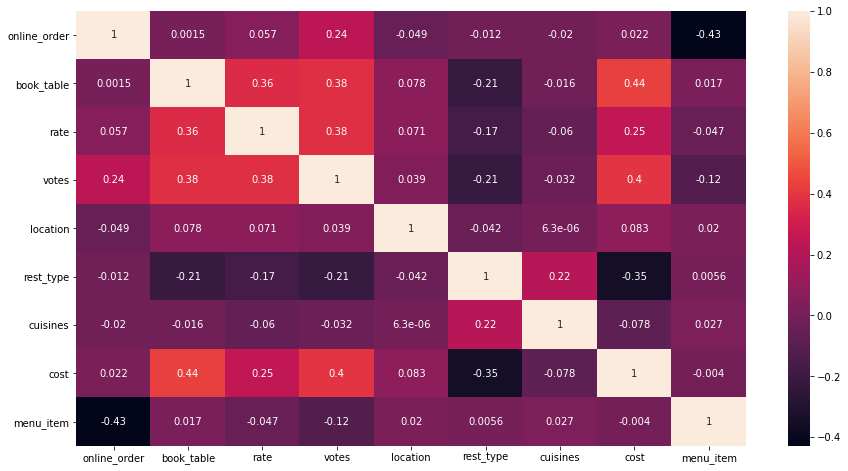

In [34]:
# Checking for correlation among all the x(inputs)-

corr = df.corr(method='kendall')

plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
plt.show()

In [35]:
my_data=df.iloc[:,[2,3,4,5,6,7,9,10,12]]
my_data.to_csv('Zomato_df.csv')

## * Data Visualization *

#### 1) No. of restaurants in a particular location

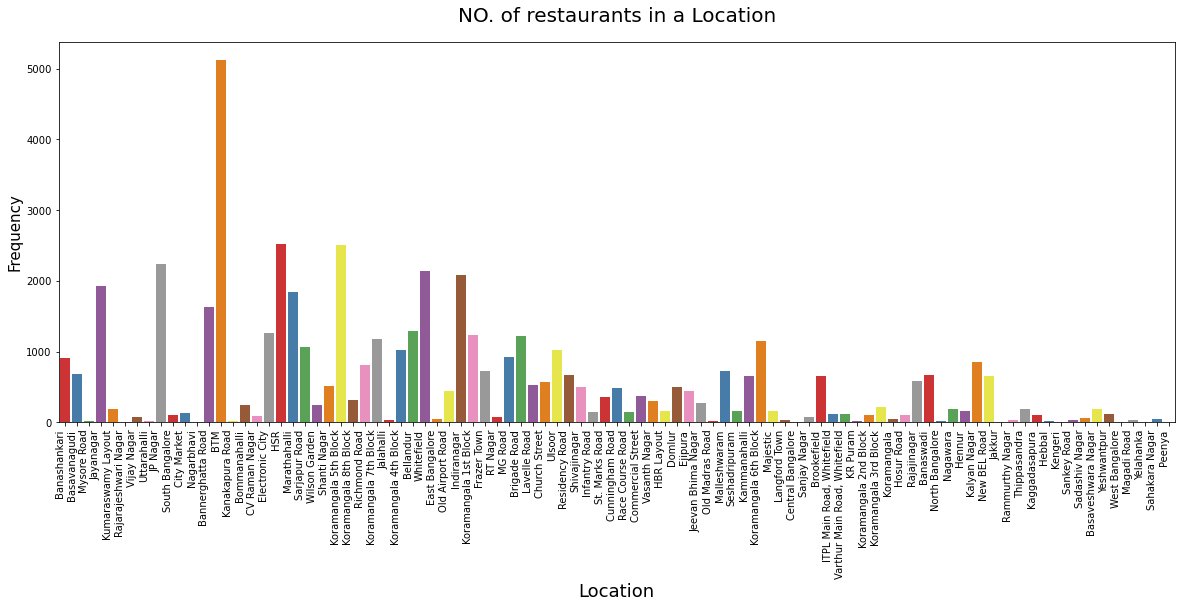

In [36]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=data, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)
plt.show()
fig.savefig("Restaurants_at_particular_location.png", dpi=200)

#### 2) Frequency of different types of restaurants

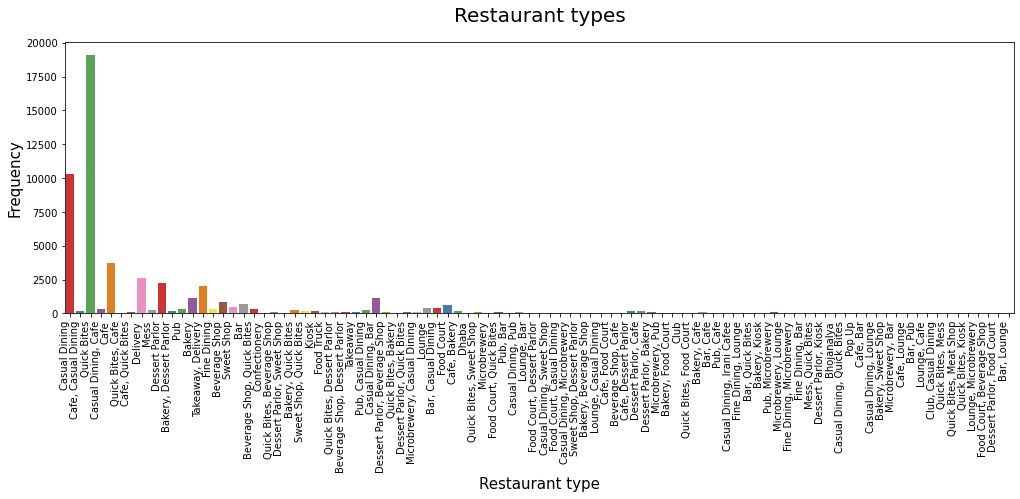

In [37]:
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=data, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)
plt.show()
fig.savefig("Frequency_ of_diff_types_of_Restaurants.png",dpi=200)

#### 3) Most famous restaurant chains in Bengaluru

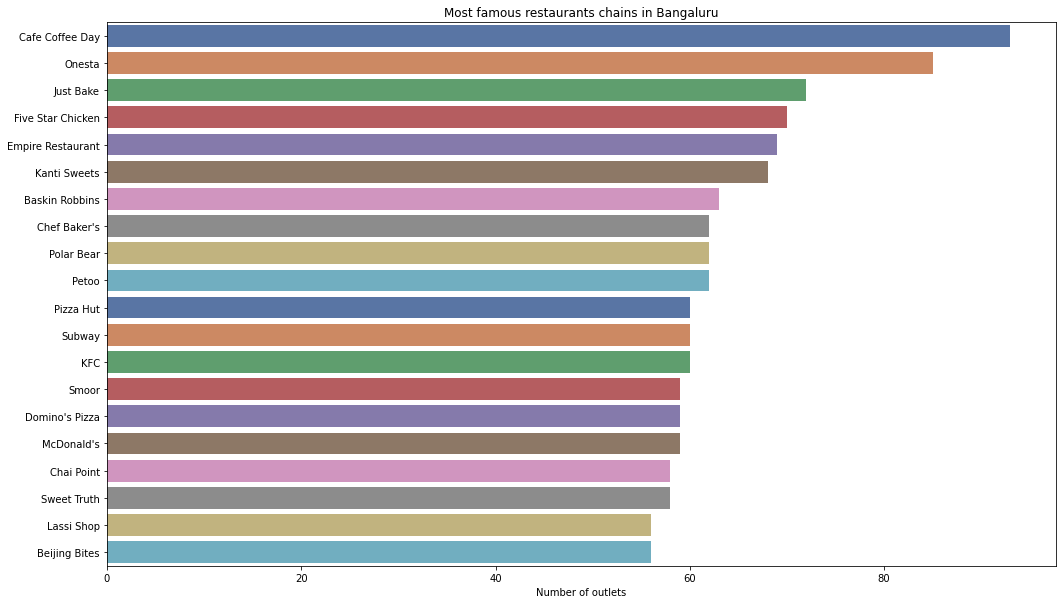

In [38]:
plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()
fig.savefig("Most_famous_Restaurants_chain_in_Bangluru.png",dpi=200)

#### 4) Number of restaurants taking online order or not

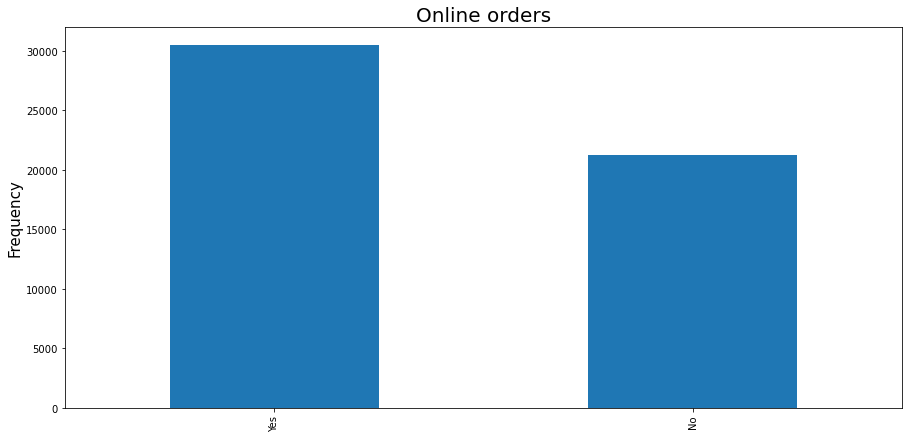

In [39]:
plt.figure(figsize=(15,7))
data['online_order'].value_counts().plot.bar()
plt.title('Online orders', fontsize = 20)
plt.ylabel('Frequency',size = 15)
plt.show()
fig.savefig("Number_of_restaurants_taking_online_order_or_not.png",dpi=200)

#### 5) Frequency of restaurants allowing booking table or not

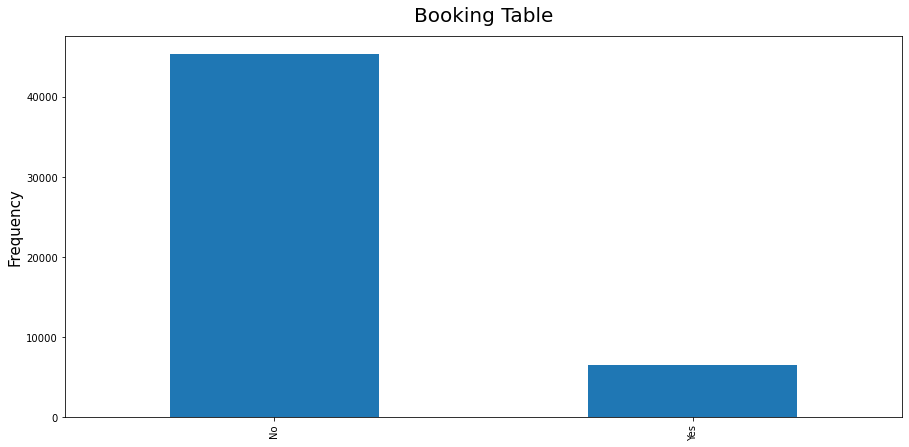

In [40]:
plt.figure(figsize=(15,7))
data['book_table'].value_counts().plot.bar()
plt.title('Booking Table', fontsize = 20,pad=15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()
fig.savefig("Frequency_of_restaurants_allowing_booking_table_or_not.png",dpi=200)

#### 6) Percentage of restaurants according to their types

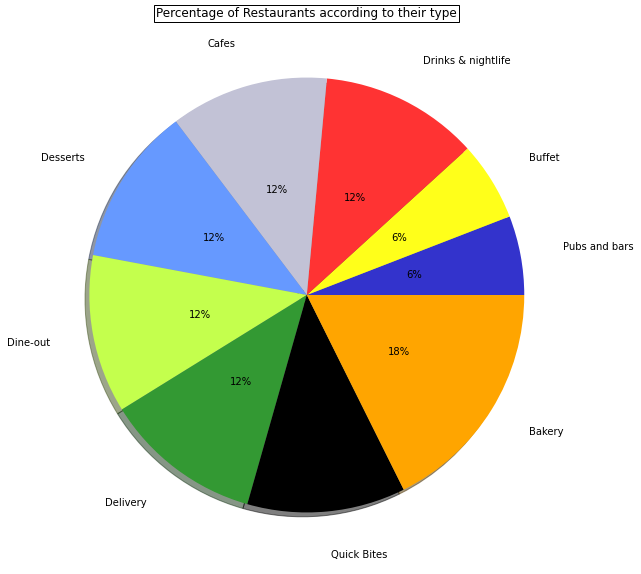

In [41]:
plt.figure(figsize=(10,10))
restaurantTypeCount=data['rest_type'].value_counts().sort_values(ascending=True)
slices=[restaurantTypeCount[0],
        restaurantTypeCount[1],
        restaurantTypeCount[2],
        restaurantTypeCount[3],
        restaurantTypeCount[4],
        restaurantTypeCount[5],
        restaurantTypeCount[6],
        restaurantTypeCount[7],
        restaurantTypeCount[8]]
labels=['Pubs and bars','Buffet','Drinks & nightlife','Cafes','Desserts','Dine-out','Delivery ','Quick Bites','Bakery']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933','black','orange']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their type", bbox={'facecolor':'1', 'pad':2})
plt.show()
fig.savefig("Percentage of restaurants according to their types.png",dpi=200)

#### 7) Distribution of restaurants according to approx cost for two people

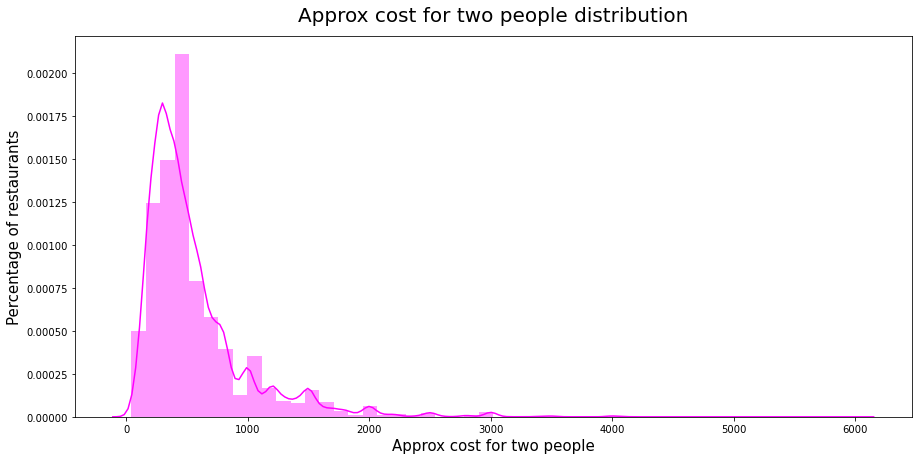

In [42]:
fig, ax = plt.subplots(figsize=[15,7])
sns.distplot(df['cost'],color="magenta")
ax.set_title('Approx cost for two people distribution',size=20,pad=15)
plt.xlabel('Approx cost for two people',size = 15)
plt.ylabel('Percentage of restaurants',size = 15)
plt.show()
fig.savefig("Distribution of restaurants according to approx cost for two people.png",dpi=200)

#### 8) Restaurant rating distribution

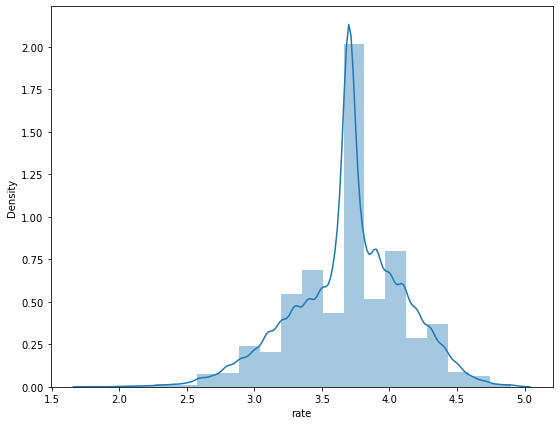

In [43]:
plt.figure(figsize=(9,7))

sns.distplot(df['rate'],bins=20)
plt.show()
fig.savefig("Restaurant rating distribution.png",dpi=200)

In [44]:
# Count of ratings as between "1 and 2", "2 and 3", "3 and 4", and "4 and 5"

In [45]:
df['rate'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       2.9       , 3.5       , 3.70044882, 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [46]:
df['rate'].min()

1.8

In [47]:
df['rate'].max()

4.9

In [48]:
df['rate']=df['rate'].astype(float)

In [49]:
((df['rate']>=1) & (df['rate']<2)).sum()

5

In [50]:
((df['rate']>=2) & (df['rate']<3)).sum()

2252

In [51]:
((df['rate']>=3) & (df['rate']<4)).sum()

34784

In [52]:
(df['rate']>=4).sum()

12399

#### 9) Approx cost for 2 people distribution

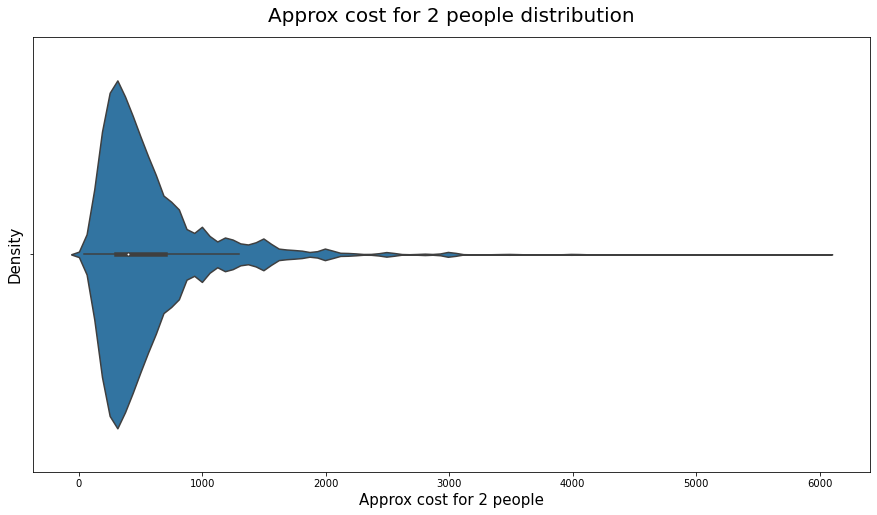

In [53]:
plt.figure(figsize=(15,8))
sns.violinplot(df.cost)
plt.title('Approx cost for 2 people distribution', size = 20, pad = 15)
plt.xlabel('Approx cost for 2 people',size = 15)
plt.ylabel('Density',size = 15)
plt.show()
fig.savefig("Approx cost for 2 people distribution.png",dpi=200)

In [54]:
# The approx cost for 2 people is around 300-400 INR

#### 10) Most popular cuisines of Bangalore

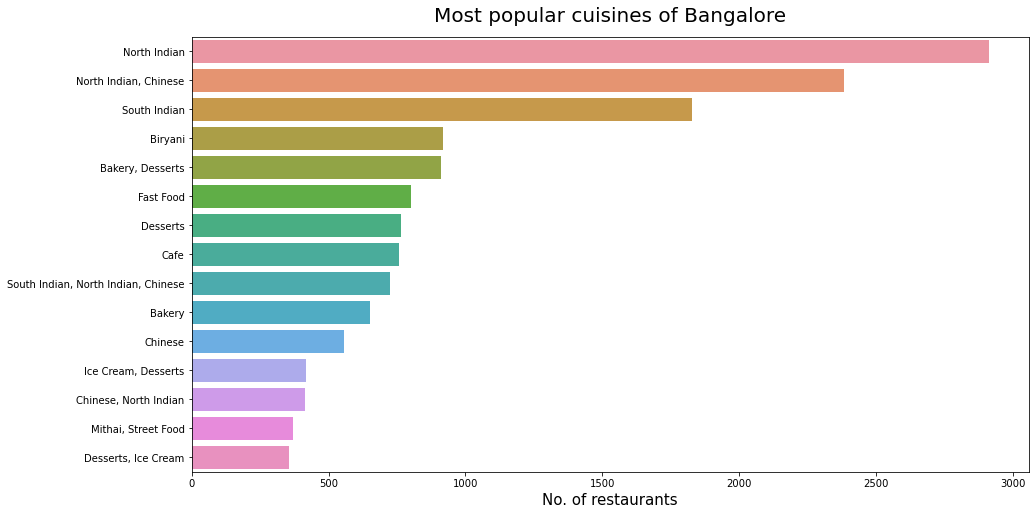

In [55]:
plt.figure(figsize=(15,8))
cuisines=data['cuisines'].value_counts()[:15]
sns.barplot(cuisines,cuisines.index)
plt.title('Most popular cuisines of Bangalore', size = 20, pad = 15)
plt.xlabel('No. of restaurants',size = 15)
plt.show()
fig.savefig("Most popular cuisines of Bangalore.png",dpi=200)

### * Data split *

In [56]:
y = df['rate']
y

0        4.100000
1        4.100000
2        3.800000
3        3.700000
4        3.800000
           ...   
49435    3.600000
49436    3.700449
49437    3.700449
49438    4.300000
49439    3.400000
Name: rate, Length: 49440, dtype: float64

In [57]:
x = df.iloc[:,[2,3,5,6,7,9,10,12]]
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,27,2091,800.0,8783
1,1,0,787,1,27,922,800.0,8783
2,1,0,918,1,22,743,800.0,8783
3,0,0,88,1,78,2469,300.0,8783
4,0,0,166,4,27,2119,600.0,8783


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)

In [59]:
x_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
31152,1,0,76,43,78,2498,300.0,8783
48660,1,0,0,89,40,1445,300.0,8783
14308,0,0,6,20,92,1737,500.0,8783
12134,0,0,6,79,8,2469,700.0,8783
6507,1,0,218,9,88,1699,400.0,7326


In [60]:
y_train.head()

31152    4.000000
48660    3.700449
14308    3.400000
12134    3.400000
6507     4.200000
Name: rate, dtype: float64

## * Model building *

### 1) Applying LinearRegression model

In [61]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [62]:
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2694580697738803

In [63]:
# Linear regression model accuracy is about 26%

### 2) Applying KNN (K Nearest neighbor) regressor

In [64]:
from sklearn.neighbors import KNeighborsRegressor
KNN_Model = KNeighborsRegressor(n_neighbors=3)
KNN_Model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [65]:
y_predict=KNN_Model.predict(x_test)
r2_score(y_test,y_predict)

0.7015524900321701

In [66]:
# KNN regressor model accuracy is about 70%

### 3) Applying RandomForest regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF_Model.fit(x_train,y_train)

RandomForestRegressor(min_samples_leaf=0.0001, n_estimators=650,
                      random_state=245)

In [68]:
y_predict=RF_Model.predict(x_test)
r2_score(y_test,y_predict)

0.8555454799757887

In [69]:
# Random Forest regressor accuracy is about 85%

### 4) Applying Extra Tree regressor

In [70]:
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(x_train,y_train)

ExtraTreesRegressor(n_estimators=120)

In [71]:
y_predict=ET_Model.predict(x_test)
r2_score(y_test,y_predict)

0.9278135058464337

In [72]:
# Extra Tree regressor accuracy is about 92%